# ANALYSE EXPLOARATOIRE DU JEU DE DONNEES

#### Import des différentes bibliothèques pour cela

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu, normaltest, skew, kurtosis, chi2_contingency
import numpy as np

### Chargement des deux jeux de données "train.csv" et "test.csv"

In [2]:
df_train = pd.read_csv("./../datasets/train.csv")
df_test = pd.read_csv("./../datasets/test.csv")

#### Affichage de la forme des deux jeux de donénes (train/test)

In [3]:
df_train.shape, df_test.shape

((165034, 14), (110023, 13))

##### PROPORTION DANS LA VARIABLE CIBLE

In [4]:
counts = df_train['Exited'].value_counts()
proportions = df_train['Exited'].value_counts(normalize=True)
percentages = proportions * 100

print("Effectifs :")
print(counts)

print("\nProportions :")
print(proportions)

print("\nPourcentages :")
print(percentages)


Effectifs :
Exited
0    130113
1     34921
Name: count, dtype: int64

Proportions :
Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

Pourcentages :
Exited
0    78.840118
1    21.159882
Name: proportion, dtype: float64


#### Comparaison des columns

In [4]:
print(df_train.columns)
print("--"*30)
print(df_test.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
------------------------------------------------------------
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


#### Affichage des 5 premières observations

In [5]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
df_train.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


#### VALAURS MANQUANTES ET DOUBLONS

In [14]:
df_train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
df_train.duplicated().sum()

np.int64(0)

#### Séparation des variables numeriques et catégorielles

In [80]:
num_vars = df_train.select_dtypes(include=np.number).drop(columns=['id', 'CustomerId'])
cat_vars = df_train.select_dtypes(include="object", exclude=np.number).drop(columns=['Surname'])

In [22]:
df_train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [81]:
print(num_vars.columns)
print("+="*35)
print(cat_vars.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=
Index(['Geography', 'Gender'], dtype='object')


### ANALYSE UNIVARIEE

##### VARIABLE NUMERIQUE

	Etude de la variable : CreditScore

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64
Skewness : -0.05929068077690959
Kurtosis : -0.0674866146940527
P-value : 5.93302143408629e-29
La distribution est asymétrique (negative) à gauche
La distribution de la variable 'CreditScore' n'est pas normale


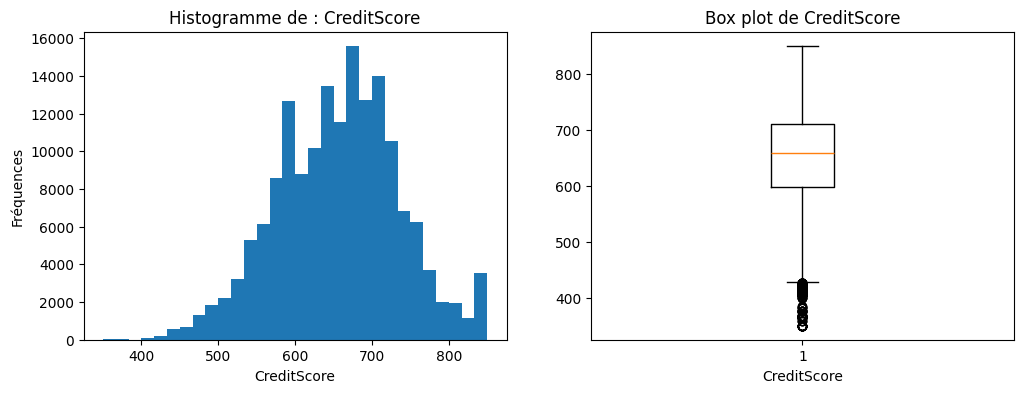

	Etude de la variable : Age

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64
Skewness : 0.9680539938699675
Kurtosis : 1.5323229710101751
P-value : 0.0
La distribution est asymétrique (positive) à droite
La distribution de la variable 'Age' n'est pas normale


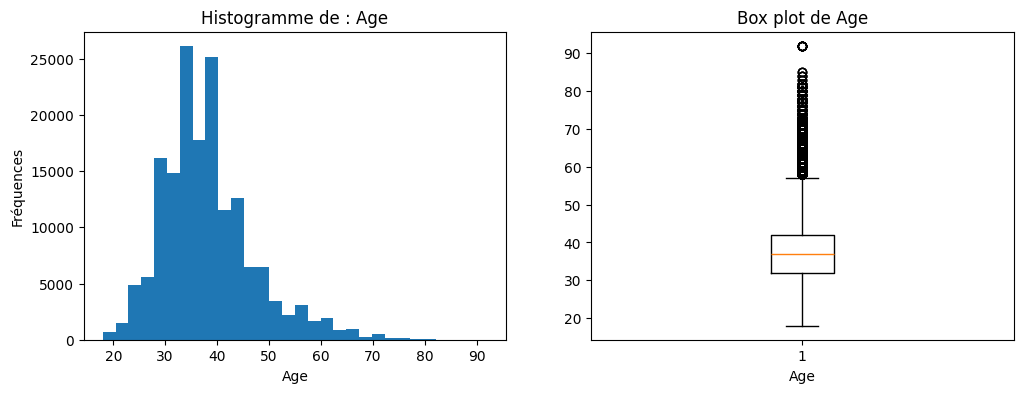

	Etude de la variable : Tenure

count    165034.000000
mean          5.020353
std           2.806159
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64
Skewness : 0.00648974724959297
Kurtosis : -1.1579224541794402
P-value : 0.0
La distribution est asymétrique (positive) à droite
La distribution de la variable 'Tenure' n'est pas normale


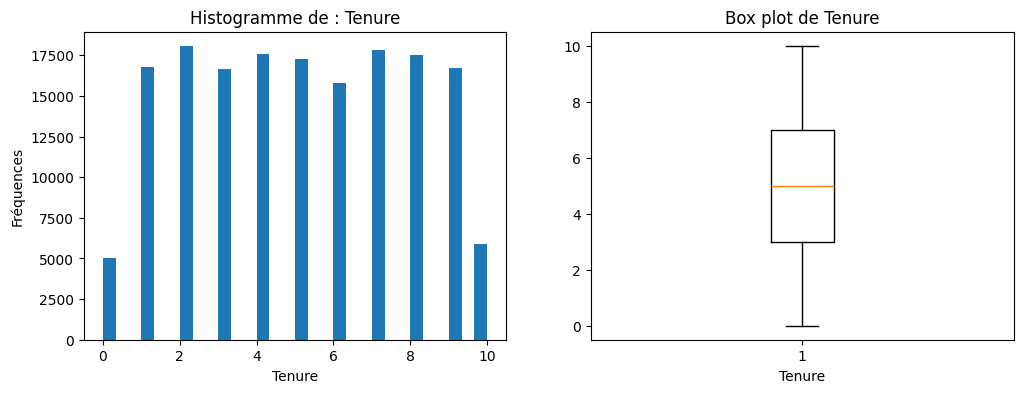

	Etude de la variable : Balance

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64
Skewness : 0.38201697619803715
Kurtosis : -1.600839711860814
P-value : 0.0
La distribution est asymétrique (positive) à droite
La distribution de la variable 'Balance' n'est pas normale


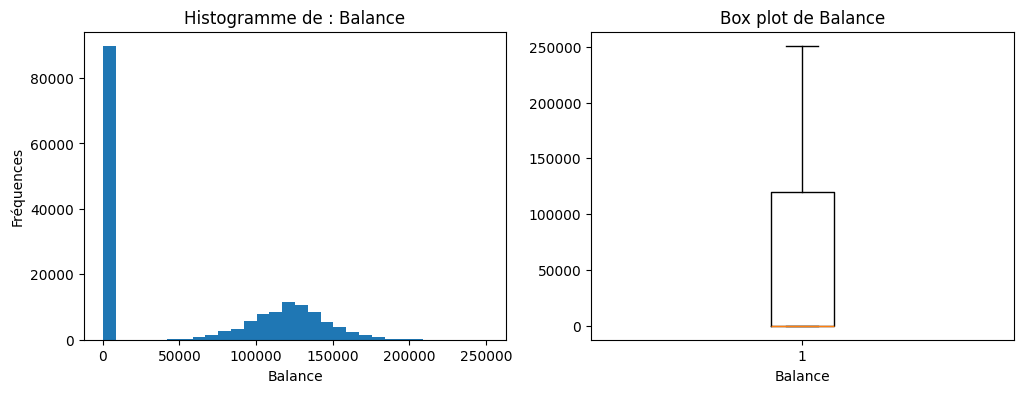

	Etude de la variable : NumOfProducts

count    165034.000000
mean          1.554455
std           0.547154
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NumOfProducts, dtype: float64
Skewness : 0.36827463223498214
Kurtosis : -0.2780870651056251
P-value : 0.0
La distribution est asymétrique (negative) à gauche
La distribution de la variable 'NumOfProducts' n'est pas normale


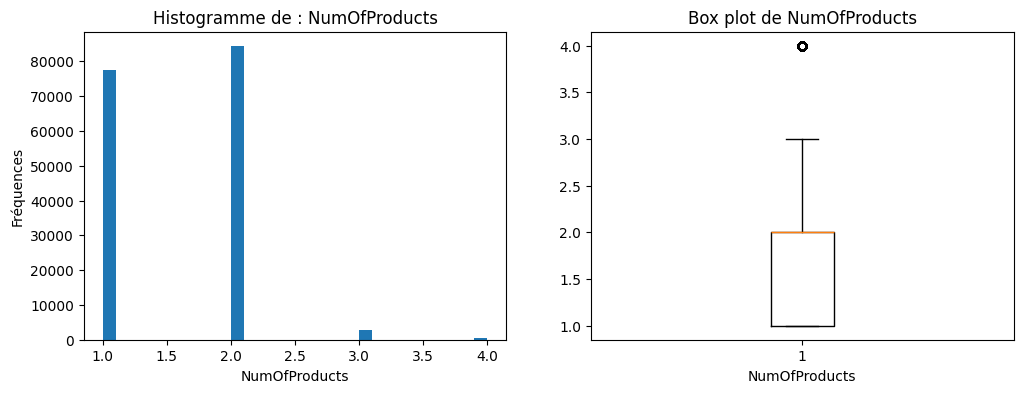

	Etude de la variable : HasCrCard

count    165034.000000
mean          0.753954
std           0.430707
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: HasCrCard, dtype: float64
Skewness : -1.1792444841084273
Kurtosis : -0.6093824466998492
P-value : 0.0
La distribution est asymétrique (negative) à gauche
La distribution de la variable 'HasCrCard' n'est pas normale


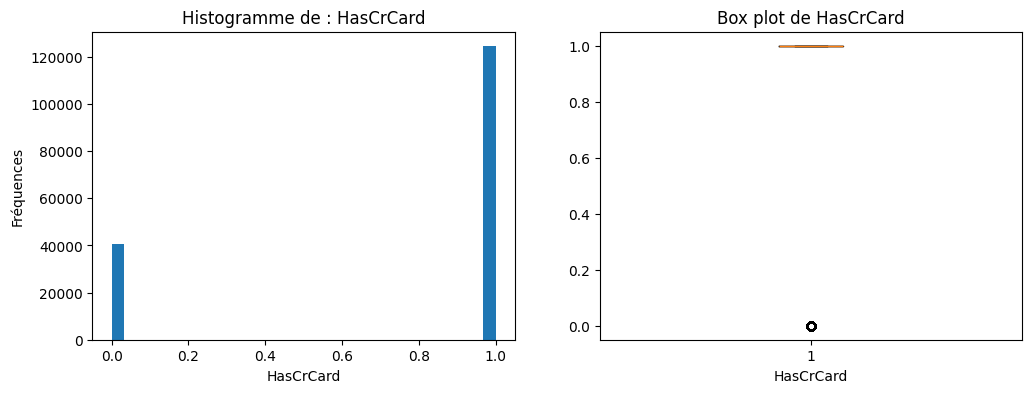

	Etude de la variable : IsActiveMember

count    165034.000000
mean          0.497770
std           0.499997
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsActiveMember, dtype: float64
Skewness : 0.008919462888748684
Kurtosis : -1.999920443181776
P-value : 0.0
La distribution est asymétrique (positive) à droite
La distribution de la variable 'IsActiveMember' n'est pas normale


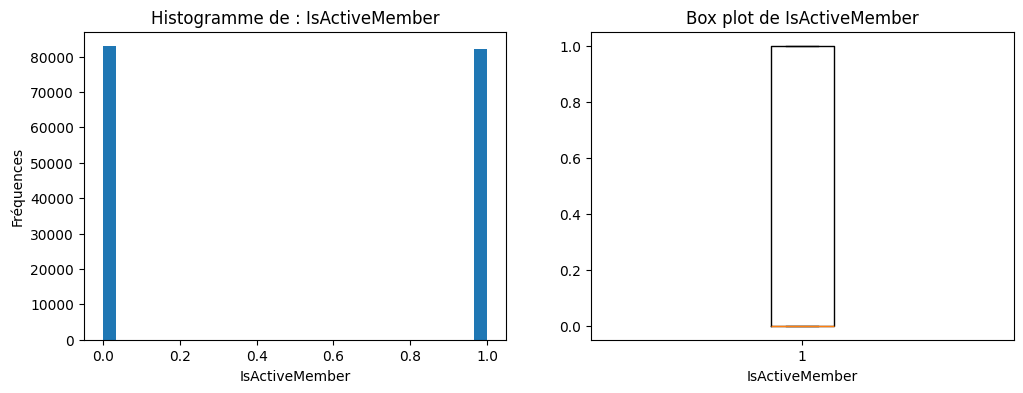

	Etude de la variable : EstimatedSalary

count    165034.000000
mean     112574.822734
std       50292.865585
min          11.580000
25%       74637.570000
50%      117948.000000
75%      155152.467500
max      199992.480000
Name: EstimatedSalary, dtype: float64
Skewness : -0.3090187310167041
Kurtosis : -0.8388557225647246
P-value : 0.0
La distribution est asymétrique (negative) à gauche
La distribution de la variable 'EstimatedSalary' n'est pas normale


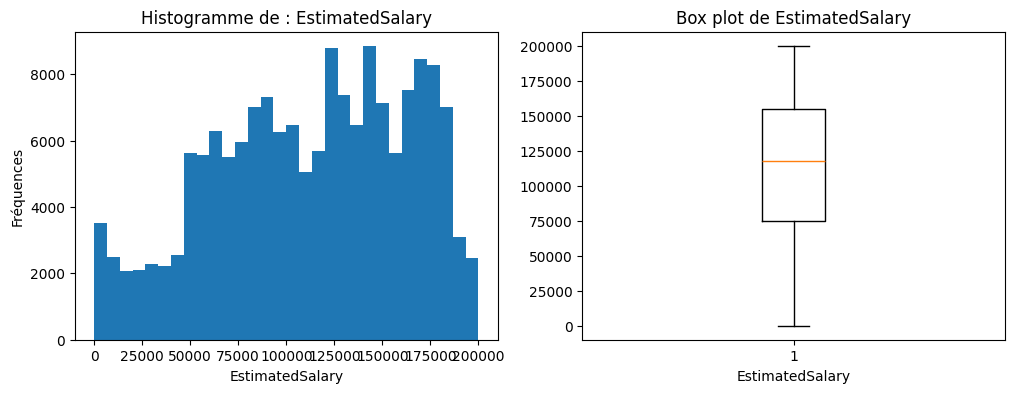

	Etude de la variable : Exited

count    165034.000000
mean          0.211599
std           0.408443
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Exited, dtype: float64
Skewness : 1.4122018316226677
Kurtosis : -0.005685986761583273
P-value : 0.0
La distribution est asymétrique (positive) à droite
La distribution de la variable 'Exited' n'est pas normale


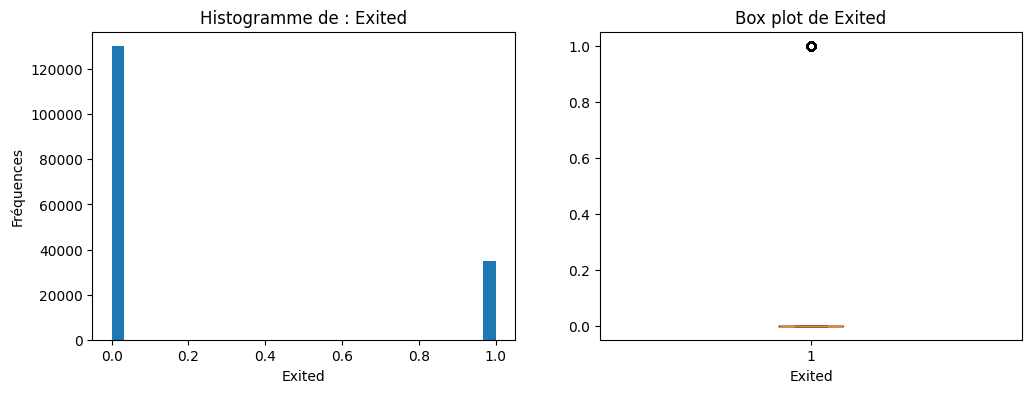

In [41]:
for var in num_vars.columns:
    print(f"\tEtude de la variable : {var}\n")
    # print("Description statistique")
    print("="*10, "QUELQUES DONNEES STATISTIQUE", "="*10)
    print(df_train[var].describe())

    skewness = skew(df_train[var])
    kurto = kurtosis(df_train[var])
    stats, p_value = normaltest(df_train[var])
    
    print(f"Skewness : {skewness}")
    print(f"Kurtosis : {kurto}")
    print(f"P-value : {p_value}")

    if df_train[var].mean() > df_train[var].median():
        print("La distribution est asymétrique (positive) à droite")
    elif df_train[var].mean() < df_train[var].median():
        print("La distribution est asymétrique (negative) à gauche")
    else:
        print("La distribution est quasi symétrique")

    if abs(skewness) > 1 or kurto > 1 or p_value <  0.05:
        print(f"La distribution de la variable '{var}' n'est pas normale")
    else:
        print(f"La distribution de la variable '{var}' est quasi normale")        

    # CREATION DE LA FIGURE
    plt.figure(figsize=(12, 4))

    # AFFICHAGE DU HISTOGRAMME
    plt.subplot(1, 2, 1)
    plt.hist(df_train[var], bins=30)
    plt.xlabel(var)
    plt.ylabel("Fréquences")
    plt.title(f"Histogramme de : {var}")    

    # AFFICHAGE DU BOXPLOT
    plt.subplot(1, 2, 2)
    plt.boxplot(df_train[var])
    plt.xlabel(var)
    plt.title(f"Box plot de {var}")

    plt.show()

##### VARIABLE CATEGORIELLE

	Etude de la variable : Geography
========== QUELQUES DONNEES STATISTIQUE ==========
count     165034
unique         3
top       France
freq       94215
Name: Geography, dtype: object
           Effectif  Frequence (%)
Geography                         
France        94215      57.088236
Spain         36213      21.942751
Germany       34606      20.969012


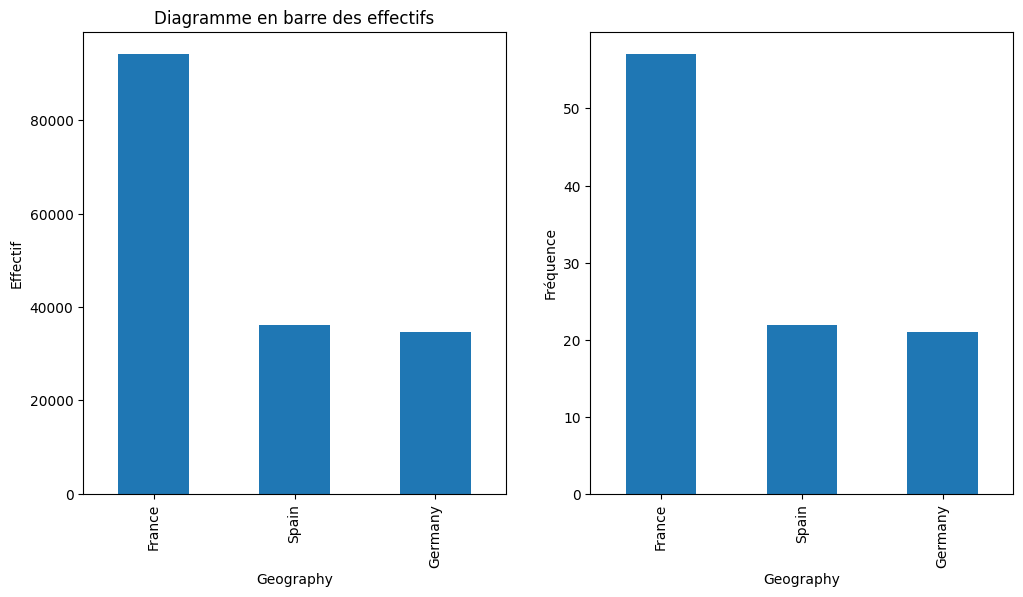

	Etude de la variable : Gender
========== QUELQUES DONNEES STATISTIQUE ==========
count     165034
unique         2
top         Male
freq       93150
Name: Gender, dtype: object
        Effectif  Frequence (%)
Gender                         
Male       93150      56.442915
Female     71884      43.557085


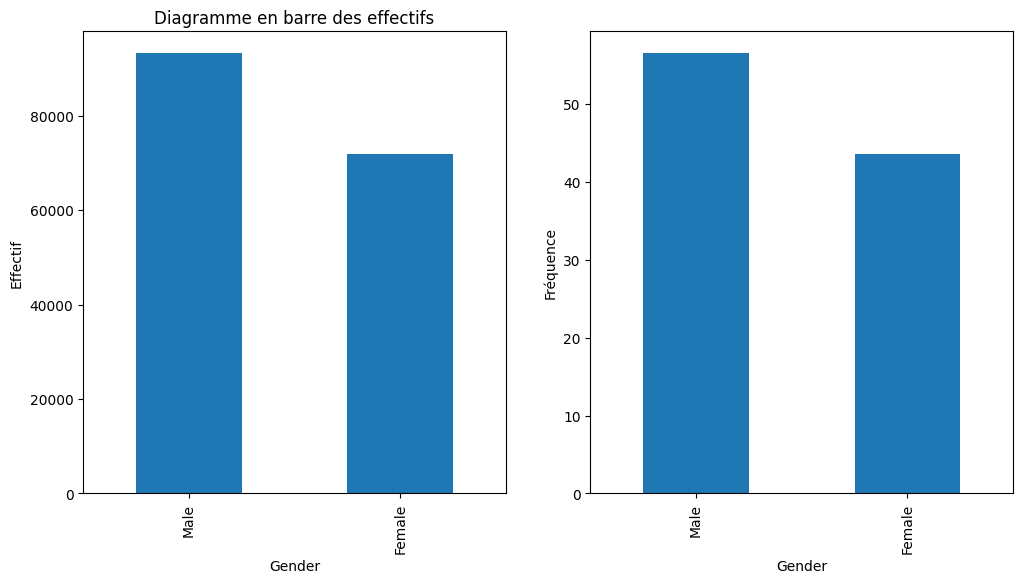

In [68]:
for var in cat_vars.columns:
    print(f"\tEtude de la variable : {var}")
    print("="*10, "QUELQUES DONNEES STATISTIQUE", "="*10)
    print(df_train[var].describe())    
    
    effectif = df_train[var].value_counts()
    freq = df_train[var].value_counts(normalize=True, dropna=False) * 100

    summary = pd.DataFrame(
        {
            'Effectif': effectif,
            'Frequence (%)': freq
        }
    )

    print(summary)

    # GRAPHIQUE
    plt.figure(figsize=(12, 6))

    # Graphe des effectifs    
    plt.subplot(1, 2, 1)
    effectif.plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel("Effectif")
    plt.title("Diagramme en barre des effectifs")

    # Graphe des fréquences
    plt.subplot(1, 2, 2)
    freq.plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel("Fréquence")

    plt.show()

### ANALYSE BIVARIEE

##### NUMERIQUE --> Exited

ANALYSE BIVARIEE : CREDITSCORE <--> Exited


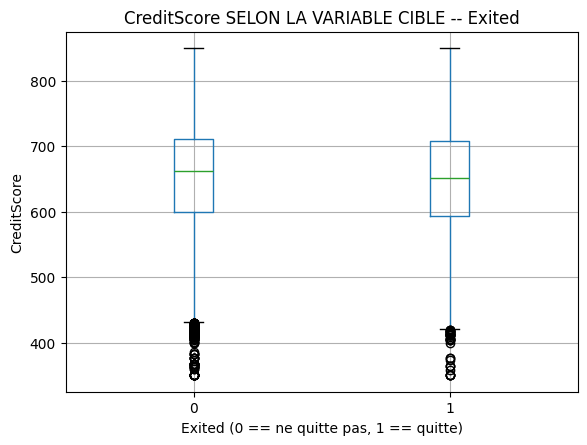

Test de Mann-Whitney U : p-value = 2.7423262578149114e-32
Mediane (Exited == 1) : 651.00
Mediane (Exited == 0) : 662.00
Interprétation : la variable 'CREDITSCORE': est plus élévée chez ceux qui ne quittent pas
ANALYSE BIVARIEE : AGE <--> Exited


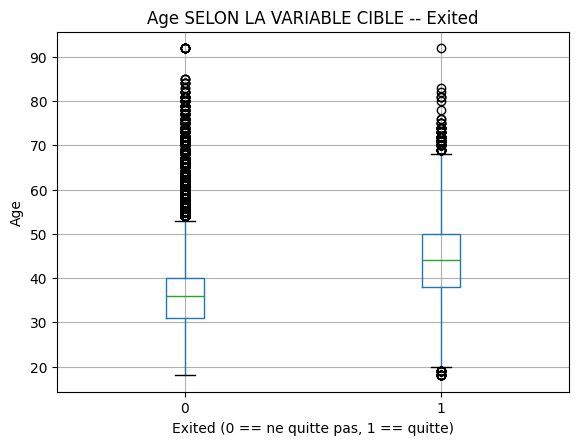

Test de Mann-Whitney U : p-value = 0.0
Mediane (Exited == 1) : 44.00
Mediane (Exited == 0) : 36.00
Interprétation : la variable 'AGE': n'est pas plus élevée chez ceux qui ne quittent pas
ANALYSE BIVARIEE : TENURE <--> Exited


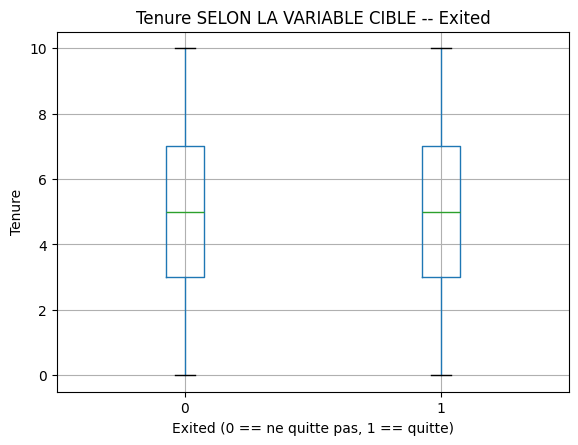

Test de Mann-Whitney U : p-value = 3.765424222122856e-15
Mediane (Exited == 1) : 5.00
Mediane (Exited == 0) : 5.00
Interprétation : la variable 'TENURE': à la même valeur dans les deux groupes
ANALYSE BIVARIEE : BALANCE <--> Exited


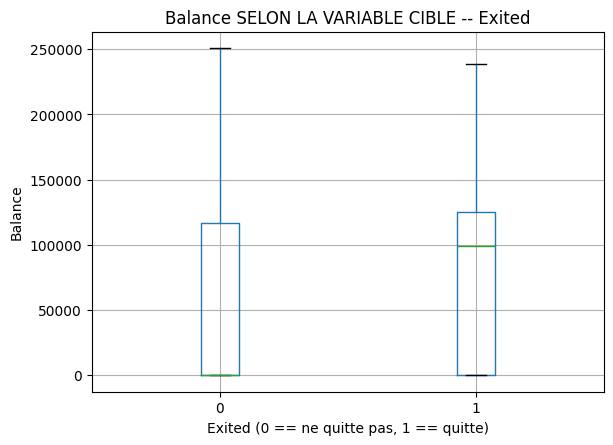

Test de Mann-Whitney U : p-value = 0.0
Mediane (Exited == 1) : 98955.87
Mediane (Exited == 0) : 0.00
Interprétation : la variable 'BALANCE': n'est pas plus élevée chez ceux qui ne quittent pas
ANALYSE BIVARIEE : NUMOFPRODUCTS <--> Exited


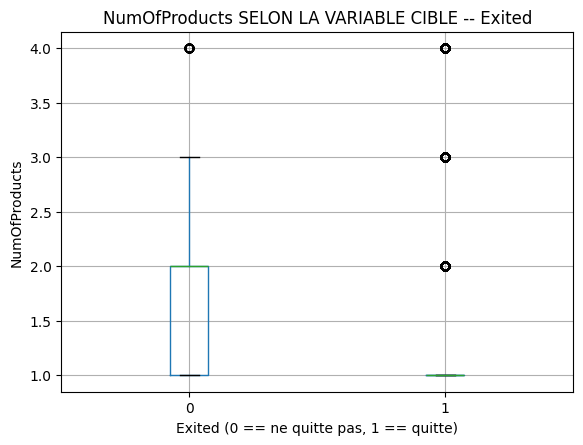

Test de Mann-Whitney U : p-value = 0.0
Mediane (Exited == 1) : 1.00
Mediane (Exited == 0) : 2.00
Interprétation : la variable 'NUMOFPRODUCTS': est plus élévée chez ceux qui ne quittent pas
ANALYSE BIVARIEE : HASCRCARD <--> Exited


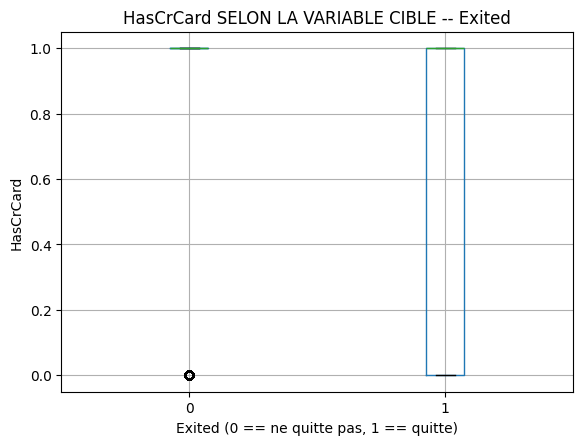

Test de Mann-Whitney U : p-value = 2.3676773035289166e-19
Mediane (Exited == 1) : 1.00
Mediane (Exited == 0) : 1.00
Interprétation : la variable 'HASCRCARD': à la même valeur dans les deux groupes
ANALYSE BIVARIEE : ISACTIVEMEMBER <--> Exited


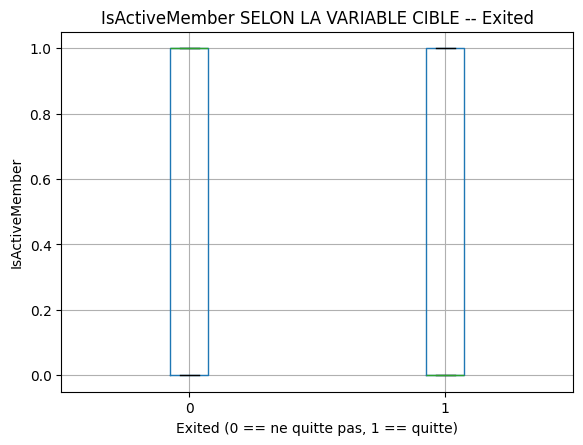

Test de Mann-Whitney U : p-value = 0.0
Mediane (Exited == 1) : 0.00
Mediane (Exited == 0) : 1.00
Interprétation : la variable 'ISACTIVEMEMBER': est plus élévée chez ceux qui ne quittent pas
ANALYSE BIVARIEE : ESTIMATEDSALARY <--> Exited


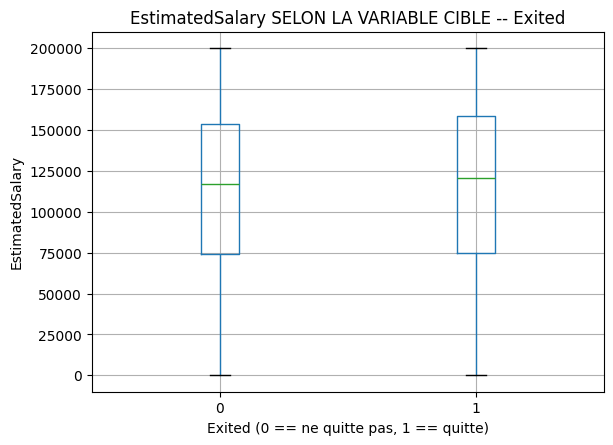

Test de Mann-Whitney U : p-value = 4.523304874968399e-16
Mediane (Exited == 1) : 120892.96
Mediane (Exited == 0) : 116977.89
Interprétation : la variable 'ESTIMATEDSALARY': n'est pas plus élevée chez ceux qui ne quittent pas


In [85]:
for var in num_vars.columns:
    if var == "Exited":
        continue
    
    print("="*50)
    print(f"ANALYSE BIVARIEE : {var.upper()} <--> Exited")

    # SEPARATION DES GROUPES
    groupe_quitte = df_train[df_train['Exited'] == 1][var]
    groupe_ne_quitte_pas = df_train[df_train['Exited'] == 0][var]

    # VISULATION
    df_train.boxplot(var, by='Exited')
    plt.title(f"{var} SELON LA VARIABLE CIBLE -- Exited")
    plt.suptitle("")
    plt.xlabel("Exited (0 == ne quitte pas, 1 == quitte)")
    plt.ylabel(var)
    plt.show()

    # TEST STATISTISQUE
    stat, p_value = mannwhitneyu(groupe_quitte, groupe_ne_quitte_pas)
    print(f"Test de Mann-Whitney U : p-value = {p_value}")

    # INTERPRETATION AUTOMATIQUE
    mediane_quitte = groupe_quitte.median()
    mediane_ne_quitte_pas = groupe_ne_quitte_pas.median()

    print(f"Mediane (Exited == 1) : {mediane_quitte:.2f}")
    print(f"Mediane (Exited == 0) : {mediane_ne_quitte_pas:.2f}")

    if mediane_ne_quitte_pas > mediane_quitte:
        print(f"Interprétation : la variable '{var.upper()}': est plus élévée chez ceux qui ne quittent pas")
    elif mediane_ne_quitte_pas == mediane_quitte:
        print(f"Interprétation : la variable '{var.upper()}': à la même valeur dans les deux groupes")        
    else:
        print(f"Interprétation : la variable '{var.upper()}': n'est pas plus élevée chez ceux qui ne quittent pas")

##### Pour Mesurer la taille dʼeffet

In [71]:
def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)

    nx = len(x)
    ny = len(y)

    greater = 0
    lower = 0

    for xi in x:
        greater += np.sum(xi > y)
        lower += np.sum(xi < y)

    return (greater - lower) / (nx * ny)

In [73]:
for var in num_vars.columns:
    if var == 'Exited':
        continue

    print("="*50)
    print(f"{var.upper()} <--> Exited")

    groupe0 = df_train[df_train['Exited'] == 0][var]
    groupe1 = df_train[df_train['Exited'] == 1][var]

    # Test
    stat, p_value = mannwhitneyu(groupe0, groupe1)

    # Taille d'effet
    delta = cliffs_delta(groupe1, groupe0)

    print(f"p-value (Mann-Whitney) : {p_value}")
    print(f"Cliff's delta : {delta}")

    # Lecture automatique
    abs_delta = abs(delta)
    if abs_delta < 0.147:
        eff = 'Négligeable'
    elif abs_delta < 0.33:
        eff = 'Faible'
    elif abs_delta < 0.474:
        eff = 'Modérée'
    else:
        eff = 'Fort'

    print(f"Taille d'effet : {eff}")

CREDITSCORE <--> Exited
p-value (Mann-Whitney) : 2.7423262578149114e-32
Cliff's delta : -0.04116130485431284
Taille d'effet : Négligeable
AGE <--> Exited
p-value (Mann-Whitney) : 0.0
Cliff's delta : 0.5009251179953118
Taille d'effet : Fort
TENURE <--> Exited
p-value (Mann-Whitney) : 3.765424222122856e-15
Cliff's delta : -0.02721849203443425
Taille d'effet : Négligeable
BALANCE <--> Exited
p-value (Mann-Whitney) : 0.0
Cliff's delta : 0.1637496370881807
Taille d'effet : Faible
NUMOFPRODUCTS <--> Exited
p-value (Mann-Whitney) : 0.0
Cliff's delta : -0.32954132005527764
Taille d'effet : Faible
HASCRCARD <--> Exited
p-value (Mann-Whitney) : 2.3676773035289166e-19
Cliff's delta : -0.02334824540648983
Taille d'effet : Négligeable
ISACTIVEMEMBER <--> Exited
p-value (Mann-Whitney) : 0.0
Cliff's delta : -0.25736212533916697
Taille d'effet : Faible
ESTIMATEDSALARY <--> Exited
p-value (Mann-Whitney) : 4.523304874968399e-16
Cliff's delta : 0.02826672388976
Taille d'effet : Négligeable


##### CATEGORIELLE --> Exited

ANALYSE BIVARIEE : Geography <--> Exited
Tableau croisé
Exited         0      1
Geography              
France     78643  15572
Germany    21492  13114
Spain      29978   6235


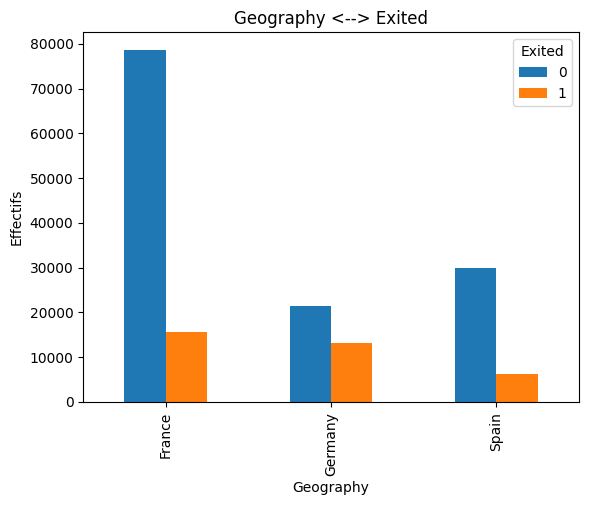

Test Khi-deux : p-value : 0.0
Association statistiquement significative detectée
ANALYSE BIVARIEE : Gender <--> Exited
Tableau croisé
Exited      0      1
Gender              
Female  51779  20105
Male    78334  14816


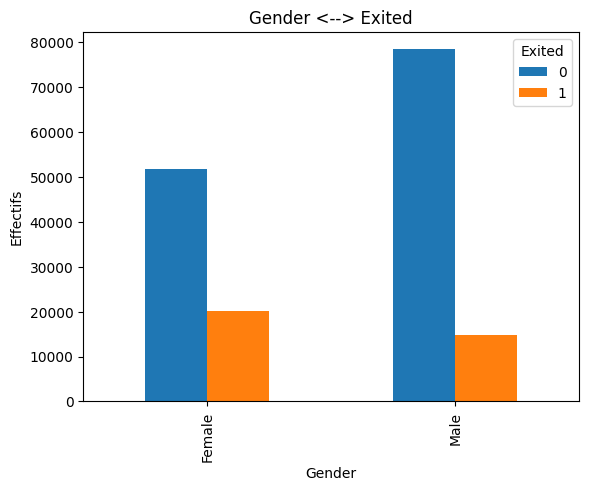

Test Khi-deux : p-value : 0.0
Association statistiquement significative detectée


In [75]:
for var in cat_vars.columns:
    print("="*50)
    print(f"ANALYSE BIVARIEE : {var} <--> Exited")

    # TABLEAU CROISE
    table = pd.crosstab(df_train[var], df_train['Exited'])
    print("Tableau croisé")
    print(table)

    # VISUALISATION
    table.plot(kind='bar')
    plt.ylabel("Effectifs")
    plt.title(f"{var} <--> Exited")
    plt.show()

    # TEST DU KHI-DEUX
    khi2, p_value, dof, expected = chi2_contingency(table)
    print(f"Test Khi-deux : p-value : {p_value}")    

    # VERIFICATION DES EFFECTIFS ATTENDUS
    if (expected < 5).any():
        print("Attention : effectifs attendus faibles (test-fragile)")

    # INTERPRETATION AUTOMATIQUE
    if p_value < 0.05:
        print("Association statistiquement significative detectée")
    else:
        print("Aucune association statistiquement significative detectée")

##### Pour mesurer la taille d'effet

In [77]:
def cramers_v(table):
    khi2, _, _, _ = chi2_contingency(table)
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(khi2 / (n * (min(r, k) - 1)))

In [ ]:
for var in cat_vars:
    print("="*50)
    print(f"{var.upper()} -- EXITED")
    table = pd.crosstab(df_train[var], df_train['Exited'])
    khi2, p_value, _, _ = chi2_contingency(table)
    v = cramers_v(table)

    print(f"p-value (Chi-deux) : {p_value}")
    print(f"Cramér's V : {v}")

    # Lecture automatique
    if v < 0.1:
        eff = "négligeable"
    elif v < 0.3:
        eff = "faible"
    elif v < 0.5:
        eff = "modéré"
    else:
        eff = "fort"
    print(f"Taille d'effet : {eff}")

GEOGRAPHY -- EXITED
p-value (Chi-deux) : 0.0
Cramér's V : 0.2111606848287342
Taille d’effet : faible
GENDER -- EXITED
p-value (Chi-deux) : 0.0
Cramér's V : 0.14642659893297552
Taille d’effet : faible
